In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'train.csv', 'test.csv']


Thanks for **UPVOTING** this kernel! Trying to become a Kernel Expert. 👍

**Importing the necessary libraries**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as ss
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%timeit 
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
dftrain=pd.read_csv("../input/train.csv")
dftest=pd.read_csv("../input/test.csv")
test=dftest.copy()

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Analysis of the data 

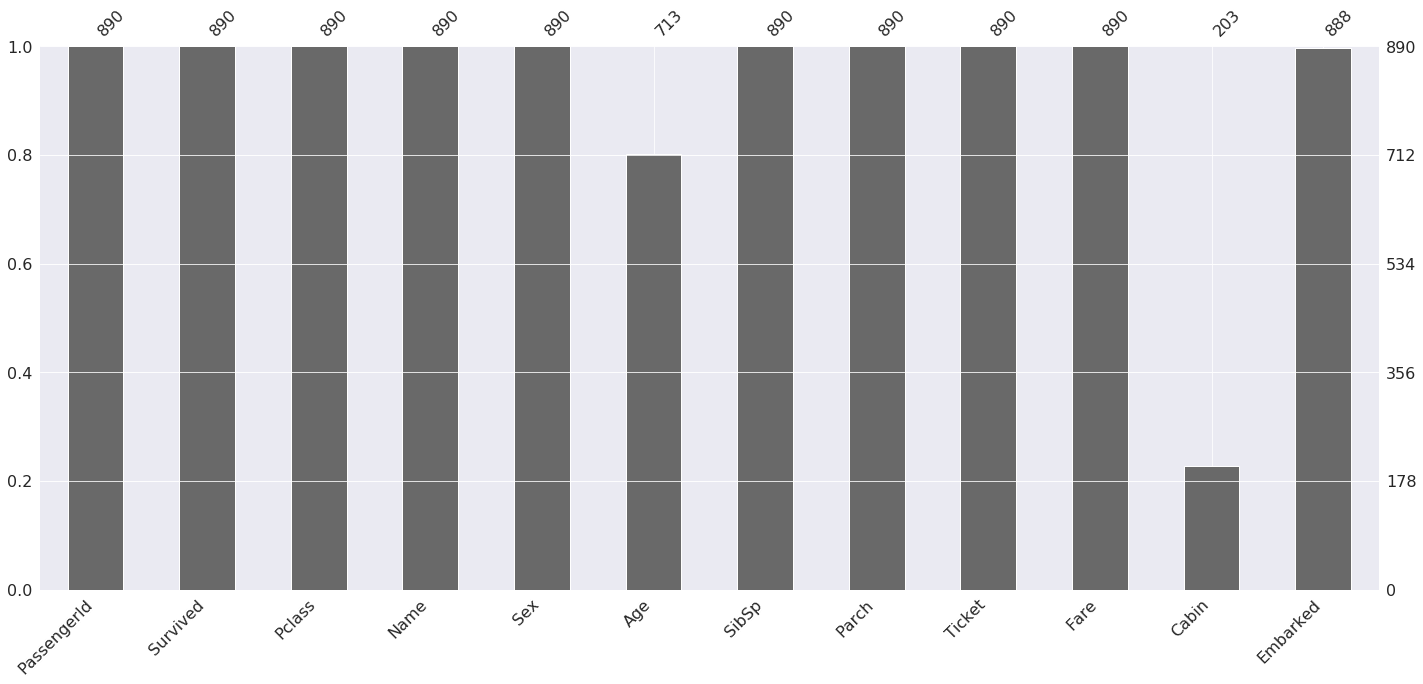

In [7]:
# Missing data
import missingno as msno
msno.bar(dftrain.sample(890))

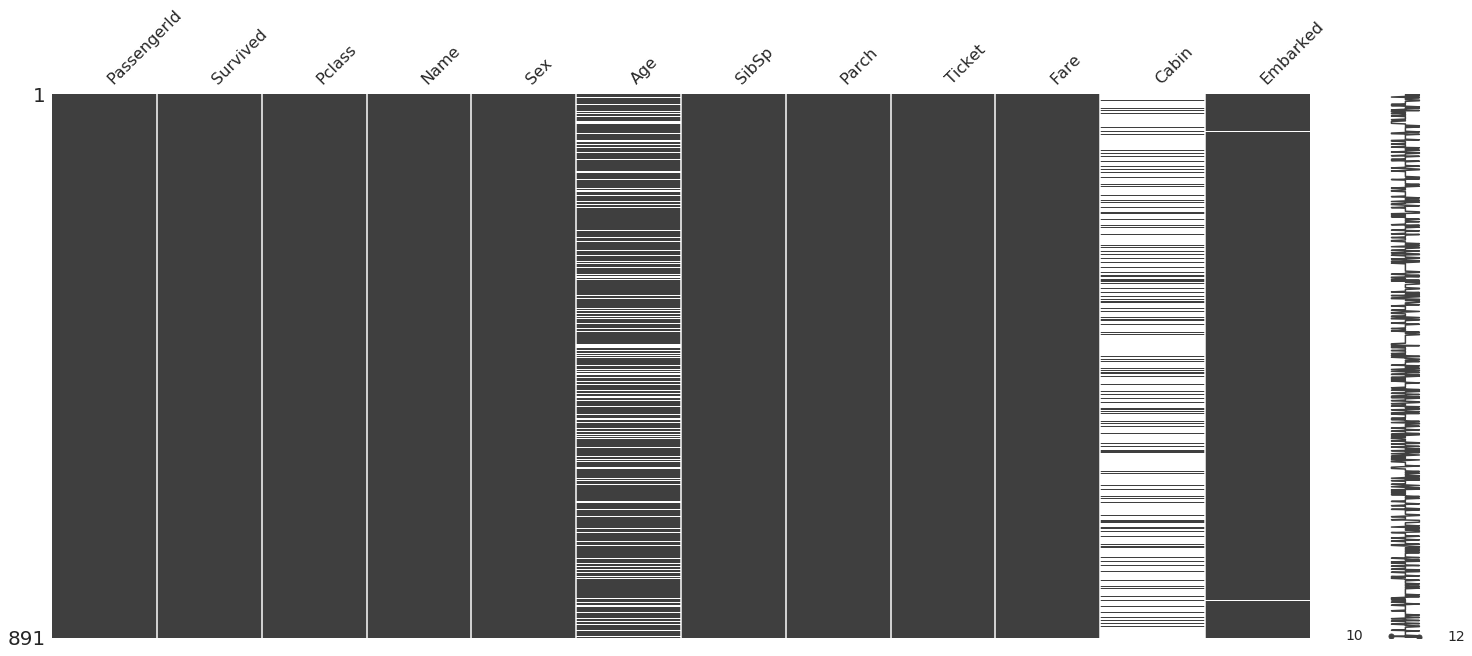

In [8]:
#Missing data in form of white lines 
msno.matrix(dftrain)

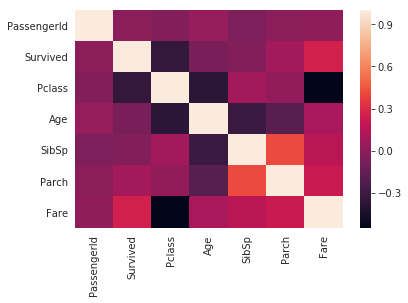

In [9]:
#The feature correlation in form of visualisation
sns.heatmap(dftrain.corr())

In [10]:
df=dftrain.copy()

In [11]:
#Survival rates of MALES and FEMALES
male1=df.loc[(df.Survived==1) &(df.Sex=='male'),:].count()
print("MALE: \n",male1) 
female1=df.loc[(df.Survived==1) & (df.Sex=='female'),:].count()
print("\nFEMALE:\n",female1)

MALE: 
 PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

FEMALE:
 PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64


male survived False    1.355286
True     0.188908
dtype: float64 , female survived False    2.095541
True     0.742038
dtype: float64


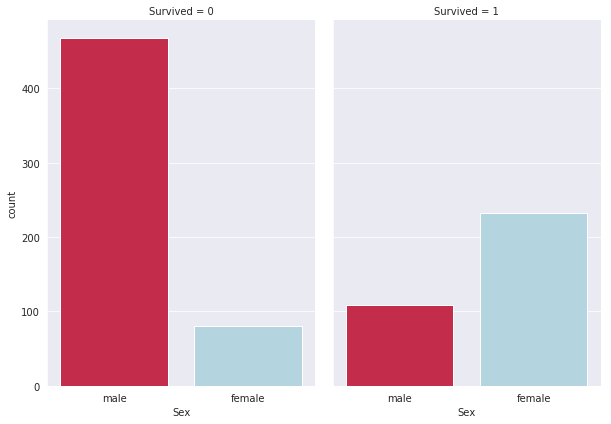

In [12]:
# Stats and Visualisation of Survival Rate
sns.factorplot(x="Sex",col="Survived", data=df , kind="count",size=6, aspect=.7,palette=['crimson','lightblue'])
malecount=pd.value_counts((df.Sex == 'male') & (df.Survived==1))
femalecount=pd.value_counts((df.Sex=='female') & (df.Survived==1))
totalmale,totalfemale=pd.value_counts(df.Sex)
print("male survived {} , female survived {}".format(malecount/totalmale,femalecount/totalfemale))

## From above statistics it is clear that Women were given more preference than Men while evacuation  

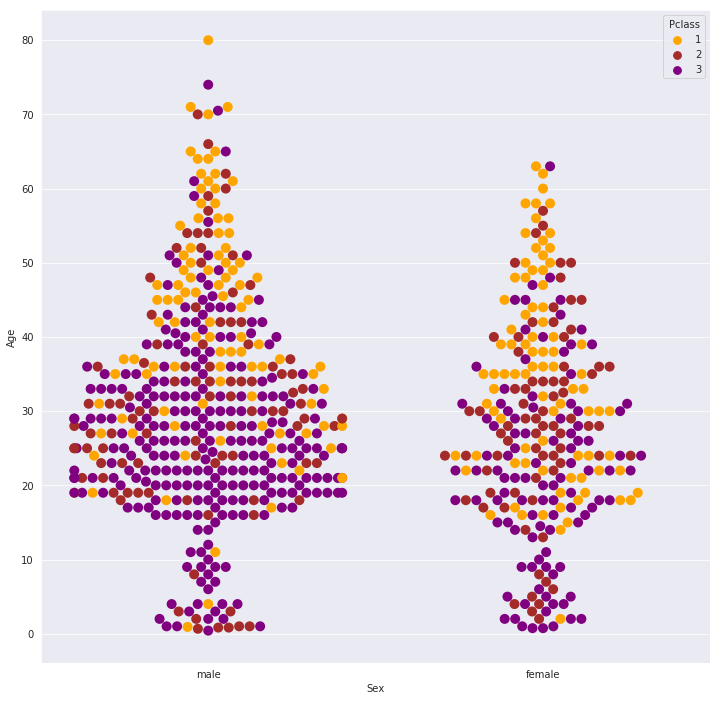

In [13]:
#Clear representation of Ages of passengers and to which Class they belonged
plt.figure(figsize=(12,12))
sns.swarmplot(x="Sex",y="Age",hue='Pclass',data=df,size=10 ,palette=['orange','brown','purple'])

## The above graph makes it clear that most of the people were aged 20-50

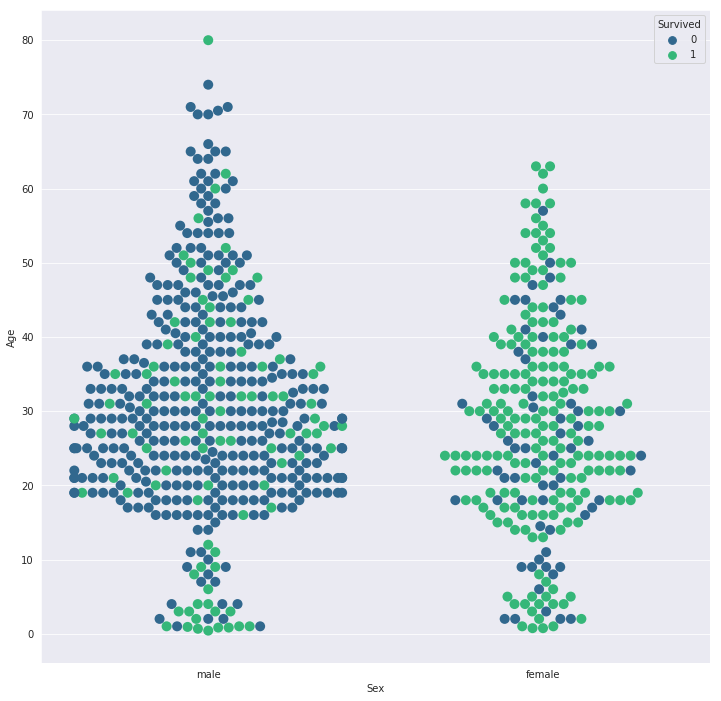

In [14]:
plt.figure(figsize=(12,12))
sns.swarmplot(x="Sex",y="Age",hue='Survived',data=df,size=10,palette='viridis')

## It is clear from visualisation that most of the survivors were children and women 

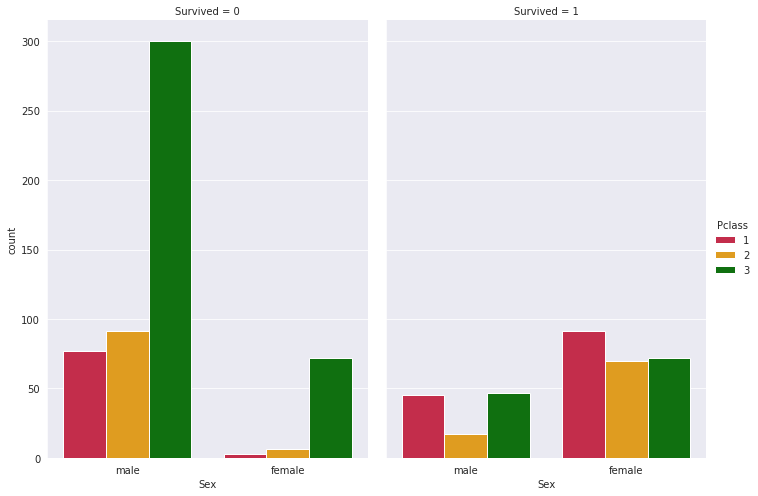

In [15]:
sns.factorplot(x="Sex", hue = "Pclass" , col="Survived", data=df , kind="count",size=7, aspect=.7,palette=['crimson','orange','green'])

## Most of the people who died were from Passenger Class 3 irrespective of Gender

In [16]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

### The above stats show us survival of each class and its clear the ones in better class had a better chance of survival
# Power of Money

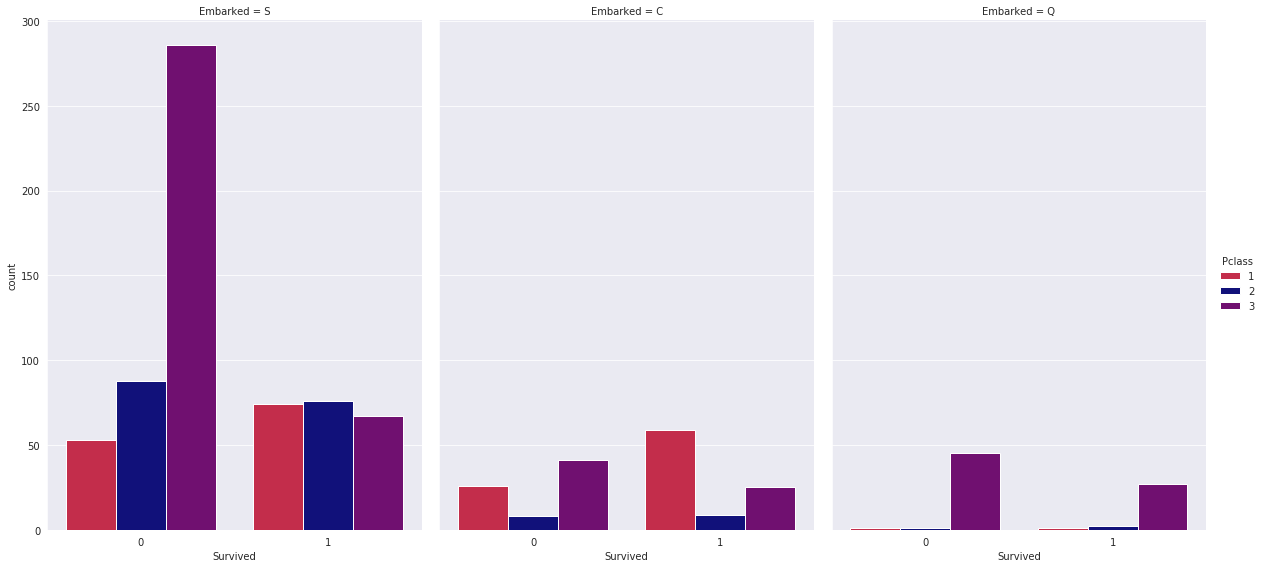

In [17]:
sns.factorplot(x="Survived",col="Embarked",data=df ,hue="Pclass", kind="count",size=8, aspect=.7,palette=['crimson','darkblue','purple'])

### Most of the embarkments were from class : S
### Least embarkments were from class : Q

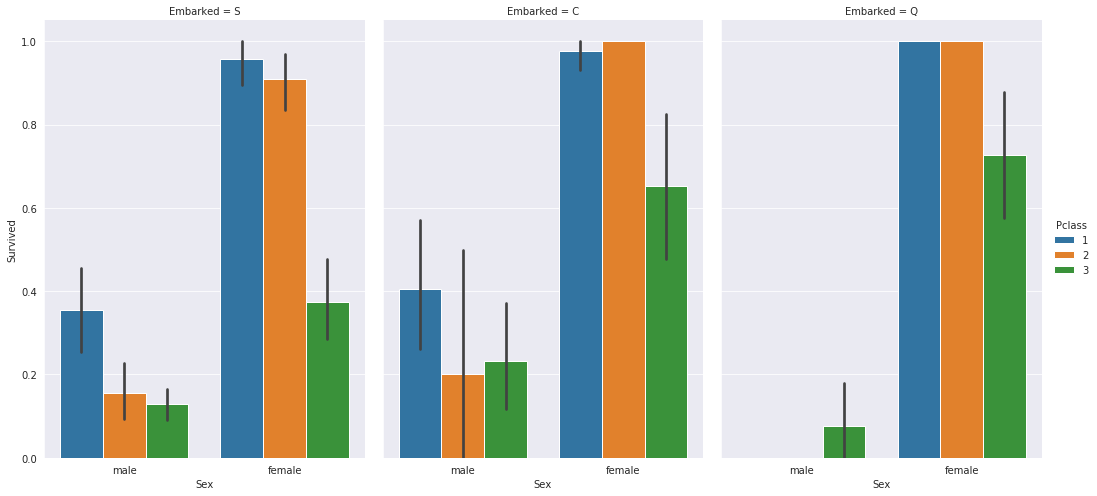

In [18]:
sns.factorplot(x="Sex", y="Survived",col="Embarked",data=df ,hue="Pclass",kind="bar",size=7, aspect=.7)

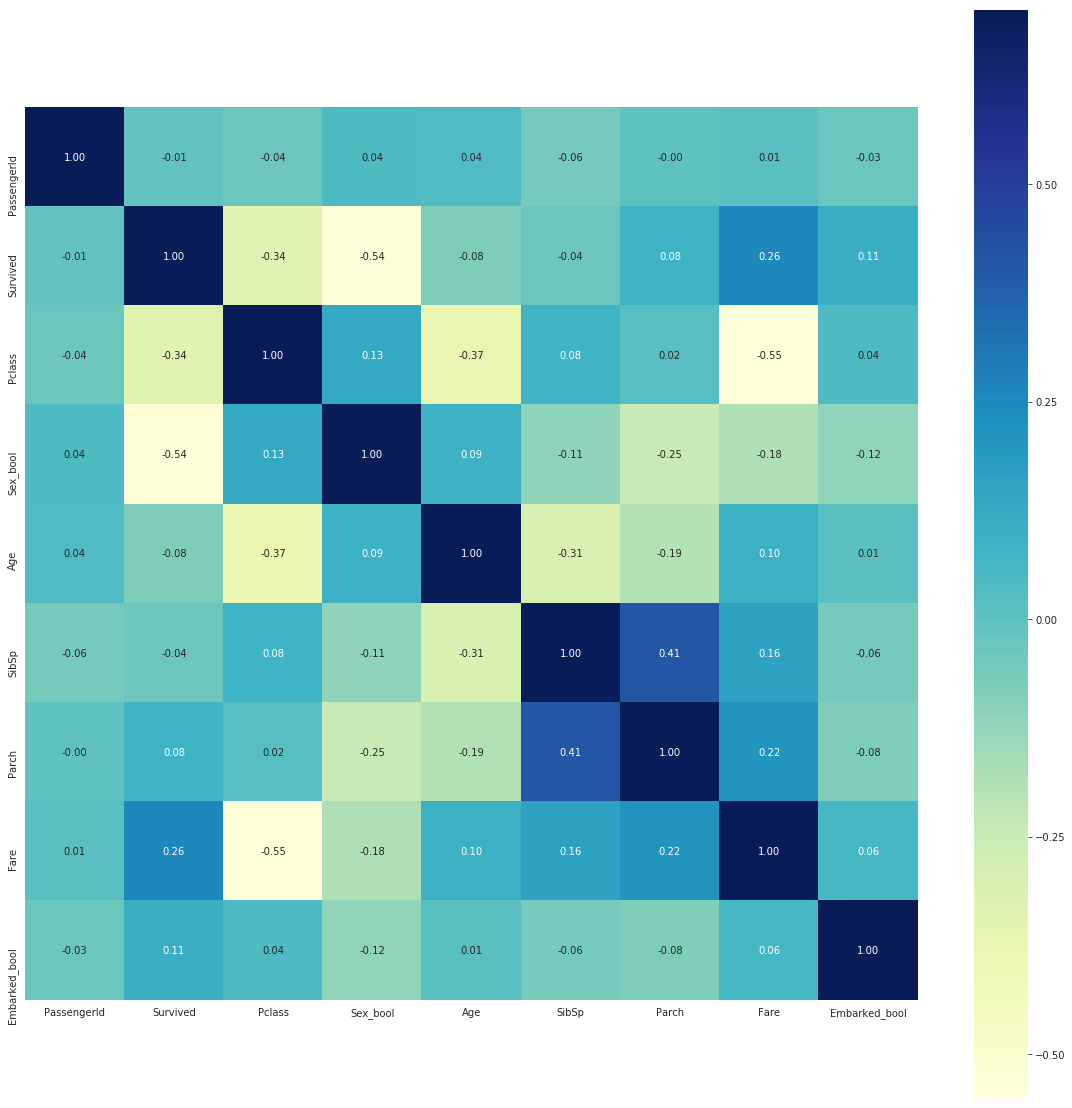

In [19]:
# Correlation Heatmap 
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
df['Sex_bool']=df.Sex.map(context1)
df["Embarked_bool"] = df.Embarked.map(context2)
plt.figure(figsize=(20,20))
correlation_map = df[['PassengerId', 'Survived', 'Pclass', 'Sex_bool', 'Age', 'SibSp',
       'Parch', 'Fare' , 'Embarked_bool']].corr()
sns.heatmap(correlation_map,vmax=.7, square=True,annot=True,fmt=".2f",cmap='YlGnBu')

# Inferences from the above heatmap
*  PassengerId is a redundant column as its very much less related to all other attributes , we can remove it .
* Also , Survived is related indirectly with Pclass and also we earlier proved that as Pclass value increases Survival decreases
* Pclass and Age are also inversely related and can also be proven by the following cell that as Pclass decreases , the mean of the Age      increases , means the much of the older travellers are travelling in high class .
* Pclass and fare are also highly inversely related as the fare of Pclass 1 would obviously be higher than corresponding Pclass 2 and 3 .
* Also , people with lower ages or children are travelling with their sibling and parents more than higher aged people (following an                inverse relation) , which is quite a bit obvious .
* Parch and SibSp are also highly directly related
* Sex_bool and Survived people are highly inversely related , i.e. females are more likely to survive than men

In [20]:
df.groupby("Pclass").Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [21]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Sex_bool           0
Embarked_bool      2
dtype: int64

In [22]:
for x in [dftrain, dftest,df]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i
df[['Age','Age_bin']].head(20)

,Age,Age_bin
0,22.0,3.0
1,38.0,4.0
2,26.0,3.0
3,35.0,4.0
4,35.0,4.0
5,NaN,NaN
6,54.0,6.0
7,2.0,1.0
8,27.0,3.0
9,14.0,2.0


<Figure size 1440x1440 with 0 Axes>

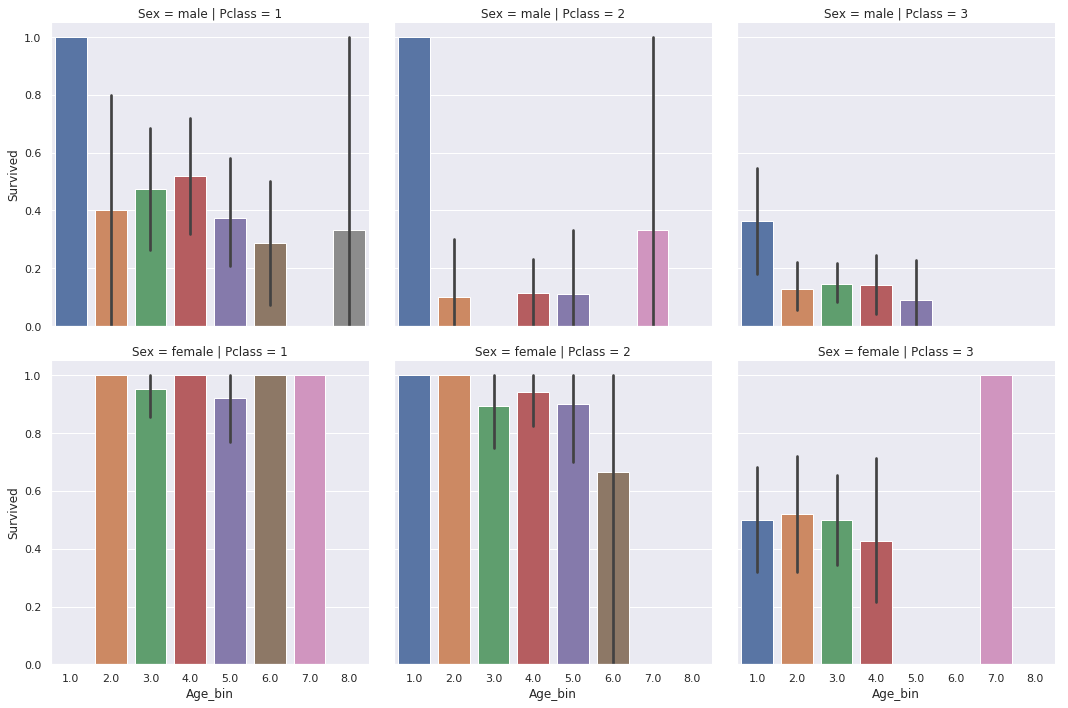

In [23]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.factorplot('Age_bin','Survived', col='Pclass' , row = 'Sex',kind="bar", data=df)

In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bool,Embarked_bool,Age_bin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,889.000000,714.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.362205,3.424370
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.636157,1.458359
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,2.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,8.000000


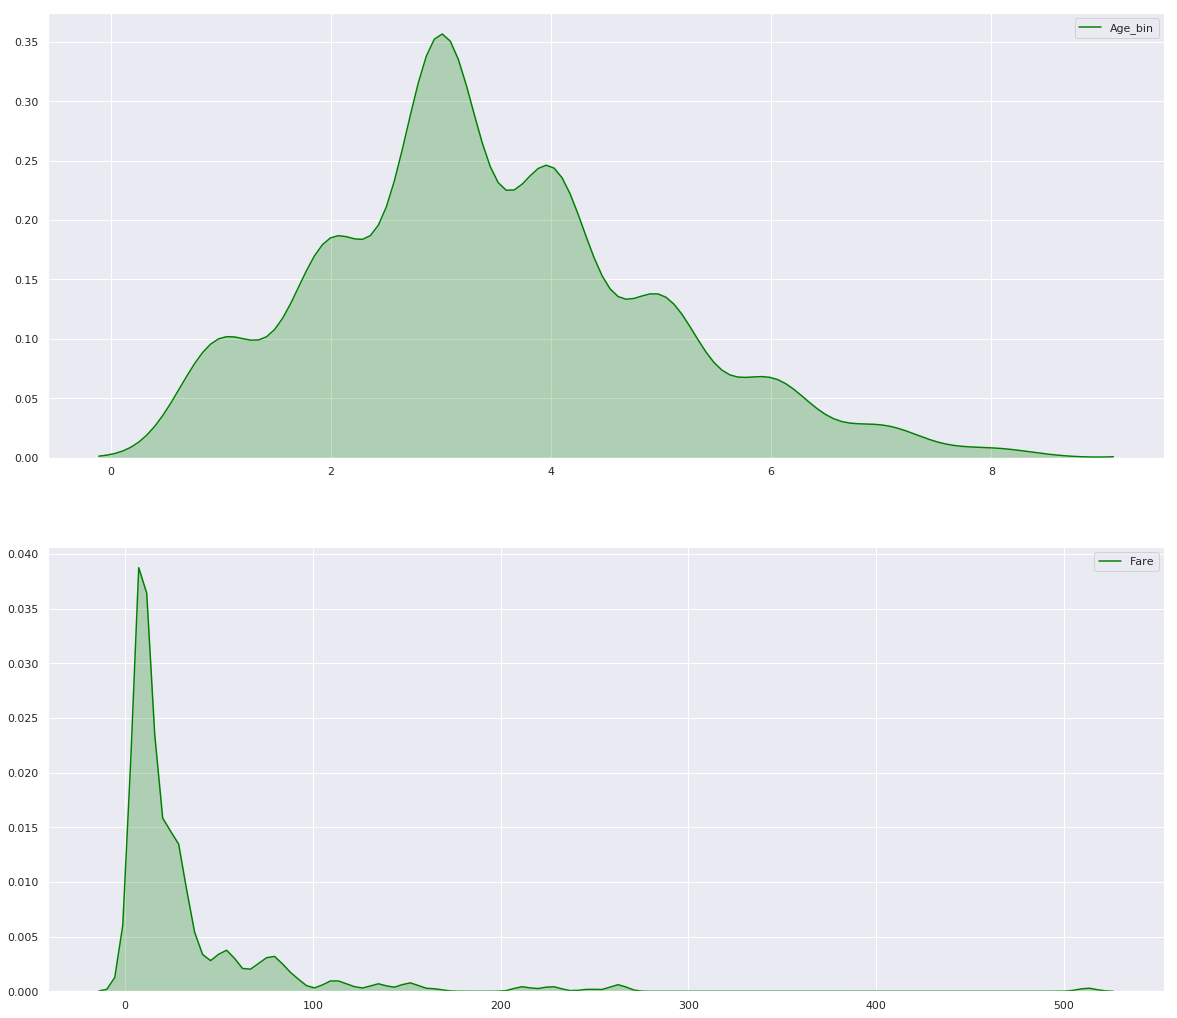

In [25]:
for x in [dftrain, dftest , df]:
    x['Fare_bin']=np.nan
    for i in range(12,0,-1):
        x.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i
fig, axes = plt.subplots(2,1)
fig.set_size_inches(20, 18)
sns.kdeplot(df.Age_bin , shade=True, color="green" , ax= axes[0])
sns.kdeplot(df.Fare , shade=True, color="green" , ax= axes[1])

# Inferences from the above graph
* Most passengers were aged from 20-40
* Most passengers paid nearly 40 units $/Rs
## As the graph is left-skewed we can use log scale or sqrt scale to change this


# Feature Engineering

In [26]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Sex_bool           0
Embarked_bool      2
Age_bin          177
Fare_bin           0
dtype: int64

In [27]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_bin        714 non-null float64
Fare_bin       891 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.5+ KB


In [28]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Age_bin        332 non-null float64
Fare_bin       418 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 42.5+ KB


In [29]:
dftrain.loc[[61,829],"Embarked"] = 'C'

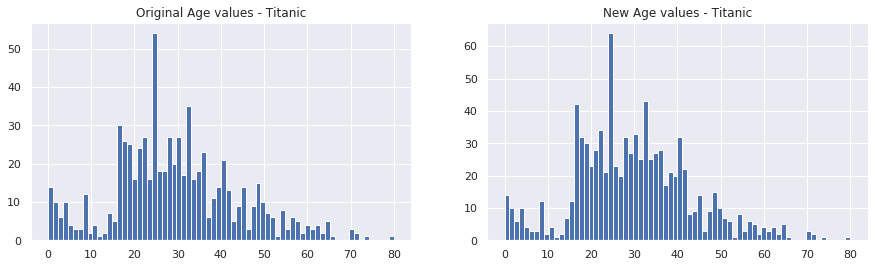

In [30]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# plot original Age values
# NOTE: drop all null values, and convert to int
dftrain['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# get average, std, and number of NaN values
average_age = dftrain["Age"].mean()
std_age = dftrain["Age"].std()
count_nan_age = dftrain["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_age = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

# fill NaN values in Age column with random values generated
age_slice = dftrain["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age

# plot imputed Age values
age_slice.astype(int).hist(bins=70, ax=axis2)

In [31]:
dftrain["Age"] = age_slice
dftrain=dftrain.drop('Age_bin',axis=1)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Fare_bin       891 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


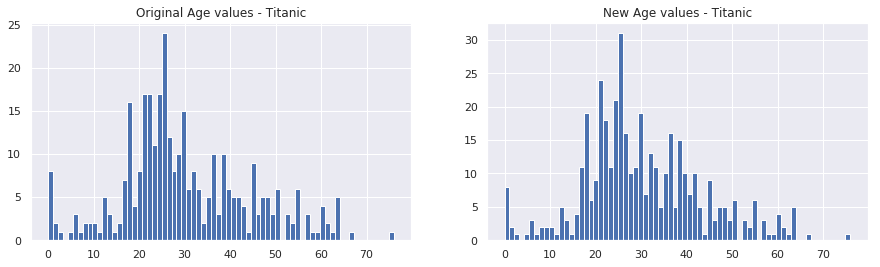

In [32]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# plot original Age values
# NOTE: drop all null values, and convert to int
dftest['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# get average, std, and number of NaN values
average_age = dftest["Age"].mean()
std_age = dftest["Age"].std()
count_nan_age = dftest["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_age = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

# fill NaN values in Age column with random values generated
age_slice = dftest["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age

# plot imputed Age values
age_slice.astype(int).hist(bins=70, ax=axis2)

In [33]:
dftest["Age"] = age_slice
dftest=dftest.drop('Age_bin',axis=1)

In [34]:
family_df = dftrain.loc[:,["Parch", "SibSp", "Survived"]]

# Create a family size variable including the passenger themselves
family_df["Fsize"] = family_df.SibSp + family_df.Parch + 1

family_df.head()


,Parch,SibSp,Survived,Fsize
0,0,1,0,2
1,0,1,1,2
2,0,0,1,1
3,0,1,1,2
4,0,0,0,1


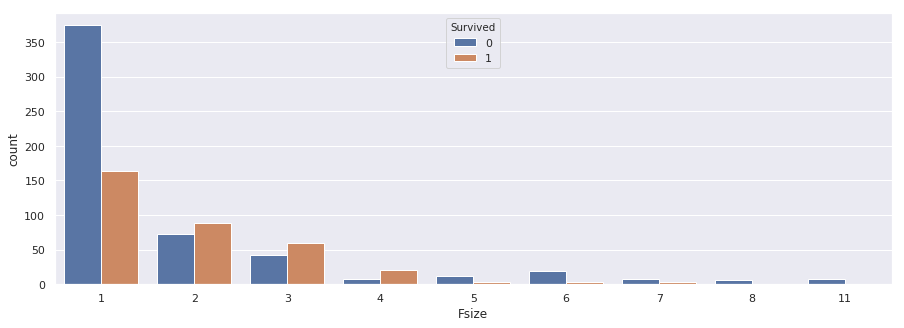

In [35]:
plt.figure(figsize=(15,5))

# visualize the relationship between family size & survival
sns.countplot(x='Fsize', hue="Survived", data=family_df)

In [36]:
dftrain['Fsize']=family_df['Fsize']

### Bigger the family lesser the chance of survival


In [37]:
family_df_t= dftest.loc[:,["Parch", "SibSp", "Survived"]]

# Create a family size variable including the passenger themselves
family_df_t["Fsize"] = family_df_t.SibSp + family_df_t.Parch + 1
dftest['Fsize']=family_df_t['Fsize']
family_df_t.head()
dftest['Fsize']=family_df_t['Fsize']

In [38]:
dftest.loc[[152],"Fare"] = 10

In [39]:
family_df_tr= dftrain.loc[:,["Parch", "SibSp", "Survived"]]

# Create a family size variable including the passenger themselves
family_df_tr["Fsize"] = family_df_tr.SibSp + family_df_tr.Parch + 1

family_df_tr.head()
dftrain['Fsize']=family_df_tr['Fsize']

In [40]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(dftrain)

#Feature Selection
testColumns = ['Embarked','Cabin','Pclass','Age','Name','Fare','Fare_bin','Fsize']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Survived" )

Embarked is IMPORTANT for Prediction
Cabin is IMPORTANT for Prediction
Pclass is IMPORTANT for Prediction
Age is IMPORTANT for Prediction
Name is NOT an important predictor. (Discard Name from model)
Fare is IMPORTANT for Prediction
Fare_bin is IMPORTANT for Prediction
Fsize is IMPORTANT for Prediction


### Using Chi- Squared test at 5% we get the above results telling us which are important  features


In [41]:
# Make a copy of the titanic data frame
dftrain['Title'] = dftrain['Name']
# Grab title from passenger names
dftrain["Title"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

rare_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
dftrain['Title'].replace(rare_titles, "Rare title", inplace=True)
# Also reassign mlle, ms, and mme accordingly
dftrain['Title'].replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

### Making some changes in the titles 

In [42]:
cT = ChiSquare(dftrain)

#Feature Selection
testColumns = ['Embarked','Cabin','Pclass','Age','Name','Fare','Fare_bin','Fsize','Title','SibSp','Parch']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="Survived" )  

Embarked is IMPORTANT for Prediction
Cabin is IMPORTANT for Prediction
Pclass is IMPORTANT for Prediction
Age is IMPORTANT for Prediction
Name is NOT an important predictor. (Discard Name from model)
Fare is IMPORTANT for Prediction
Fare_bin is IMPORTANT for Prediction
Fsize is IMPORTANT for Prediction
Title is IMPORTANT for Prediction
SibSp is IMPORTANT for Prediction
Parch is IMPORTANT for Prediction


In [43]:
dftest=dftest.drop(['Ticket','PassengerId'],axis=1)

In [44]:
dftest['Title'] = dftest['Name']
# Grab title from passenger names

dftest["Title"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)

In [45]:
dftrain=dftrain.drop('Name',axis=1)

In [46]:
dftrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_bin,Fsize,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,2,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,2,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0,2,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1.0,1,Mr


In [47]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
context3= {"Mr":0 , "Mrs":1 , "Miss":2,'Master':3}

dftrain['Sex_bool']=dftrain.Sex.map(context1)
dftrain["Embarked_bool"] = dftrain.Embarked.map(context2)
dftrain['Title']=dftrain.Title.map(context3)

### Above we are creating boolean values for the model to understand 

In [48]:
dftrain=dftrain.drop(['PassengerId','Cabin','Ticket'],axis=1)
dftrain=dftrain.drop(['Embarked','Sex'],axis=1)
dftrain.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_bin,Fsize,Title,Sex_bool,Embarked_bool
0,0,3,22.0,1,0,7.2500,1.0,2,0.0,1,0
1,1,1,38.0,1,0,71.2833,2.0,2,1.0,0,1
2,1,3,26.0,0,0,7.9250,1.0,1,2.0,0,0
3,1,1,35.0,1,0,53.1000,2.0,2,1.0,0,0
4,0,3,35.0,0,0,8.0500,1.0,1,0.0,1,0


In [49]:
dftest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_bin,Fsize,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,1.0,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,2.0,2,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,1.0,1,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,2.0,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,1.0,3,Mrs


In [50]:
context1 = {"female":0 , "male":1}
context2 = {"S":0 , "C":1 , "Q":2}
context3= {"Mr":0 , "Mrs":1 , "Miss":2,'Master':3}

dftest['Sex_bool']=dftest.Sex.map(context1)
dftest["Embarked_bool"] = dftest.Embarked.map(context2)
dftest['Title']=dftest.Title.map(context3)

In [51]:
dftest=dftest.drop(['Name','Sex','Embarked'],axis=1)

In [52]:
for x in [dftrain, dftest,df]:
    x['Age_bin']=np.nan
    for i in range(8,0,-1):
        x.loc[ x['Age'] <= i*10, 'Age_bin'] = i

In [53]:
for x in [dftrain, dftest,df]:
    x['Fare_bin']=np.nan
    for i in range(12,0,-1):
        x.loc[ x['Fare'] <= i*10, 'Fare_bin'] = i

In [54]:
dftrain=dftrain.drop('Age',axis=1)
dftest=dftest.drop('Age',axis=1)

In [55]:
dftrain=dftrain.convert_objects(convert_numeric=True)

In [56]:
def change_type(df):
    float_list=list(df.select_dtypes(include=["float"]).columns)
    print(float_list)
    for col in float_list:
        df[col]=df[col].fillna(0).astype(np.int64)
        
    return df    
change_type(dftrain)   
dftrain.dtypes

['Fare', 'Fare_bin', 'Title', 'Age_bin']


Survived         int64
Pclass           int64
SibSp            int64
Parch            int64
Fare             int64
Fare_bin         int64
Fsize            int64
Title            int64
Sex_bool         int64
Embarked_bool    int64
Age_bin          int64
dtype: object

In [57]:
dftrain.head()

,Survived,Pclass,SibSp,Parch,Fare,Fare_bin,Fsize,Title,Sex_bool,Embarked_bool,Age_bin
0,0,3,1,0,7,1,2,0,1,0,3
1,1,1,1,0,71,8,2,1,0,1,4
2,1,3,0,0,7,1,1,2,0,0,3
3,1,1,1,0,53,6,2,1,0,0,4
4,0,3,0,0,8,1,1,0,1,0,4


In [58]:
x=dftrain.iloc[:,1:].values
y=dftrain.iloc[:,0].values
print(dftrain.columns)
print(dftest.columns)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Fare_bin', 'Fsize',
       'Title', 'Sex_bool', 'Embarked_bool', 'Age_bin'],
      dtype='object')
Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Fare_bin', 'Fsize',
       'Title', 'Sex_bool', 'Embarked_bool', 'Age_bin'],
      dtype='object')


In [59]:
dftest=dftest.convert_objects(convert_numeric=True)
change_type(dftest)    
dftest.dtypes

['Fare', 'Fare_bin', 'Title', 'Age_bin']


Pclass            int64
SibSp             int64
Parch             int64
Fare              int64
Cabin            object
Fare_bin          int64
Fsize             int64
Title             int64
Sex_bool          int64
Embarked_bool     int64
Age_bin           int64
dtype: object

# Applying different types of ML algorithms to find the best accuracies 

In [60]:
MLA = []
Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() , GaussianNB() ,
    RandomForestClassifier() , GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" , "GaussianNB" ,
    "RandomForestClassifier" , "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))
MLA    

[0.7723880597014925,
 0.7835820895522388,
 0.7985074626865671,
 0.7574626865671642,
 0.7947761194029851,
 0.8022388059701493,
 0.8208955223880597]

In [61]:
d = { "Accuracy" : MLA , "Algorithm" : X }
dfm = pd.DataFrame(d)
dfm

,Accuracy,Algorithm
0,0.772388,LinearSVC
1,0.783582,DecisionTreeClassifier
2,0.798507,LogisticRegression
3,0.757463,KNeighborsClassifier
4,0.794776,GaussianNB
5,0.802239,RandomForestClassifier
6,0.820896,GradientBoostingClassifier


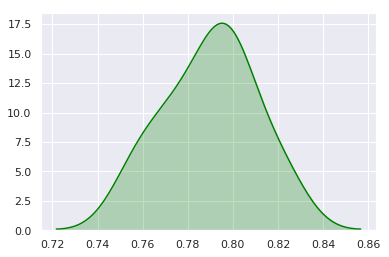

In [62]:
sns.kdeplot(MLA , shade=True, color="green")

# Tuning the parameters

In [63]:
#Logistic Regression 
params={'C':[1,100,0.01,0.1,1000],'penalty':['l2','l1']}
logreg=LogisticRegression()
gscv=GridSearchCV(logreg,param_grid=params,cv=10)
%timeit gscv.fit(x,y)

512 ms ± 5.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
gscv.predict(X_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [65]:
print(gscv.best_params_)
logregscore=gscv.best_score_
print(logregscore)

{'C': 1, 'penalty': 'l2'}
0.8148148148148148


In [66]:
gscv.score(X_test,y_test)

0.8097014925373134

In [67]:
#KNN
param={'n_neighbors':[3,4,5,6,8,9,10],'metric':['euclidean','manhattan','chebyshev','minkowski'] }       
knn = KNeighborsClassifier()
gsknn=GridSearchCV(knn,param_grid=param,cv=10)
gsknn.fit(x,y) 

print(gsknn.best_params_)
gsknn.best_score_

{'metric': 'manhattan', 'n_neighbors': 5}


0.8013468013468014

In [68]:
Survived=gsknn.predict(X_test)
print(Survived)

[1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0
 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1]


In [69]:
gsknn.score(X_test,y_test)

0.8432835820895522

In [70]:
#Random Forest
rfcv=RandomForestClassifier(n_estimators=500,max_depth=6)
rfcv.fit(X_train,y_train)
rfcv.predict(X_test)
rfcv.score(X_test,y_test)

0.8246268656716418

In [71]:
#Gradient Boosting
gbcv=GradientBoostingClassifier(learning_rate=0.001,n_estimators=2000,max_depth=5)
gbcv.fit(X_train,y_train)
gbcv.predict(X_test)
gbcv.score(X_test,y_test)

0.8246268656716418

logreg model AUC = 0.793403964456596 
random forest model AUC =0.806390977443609
KNN model AUC = 0.8340168603326498
GBC Boost model AUC = 0.8120870357712463


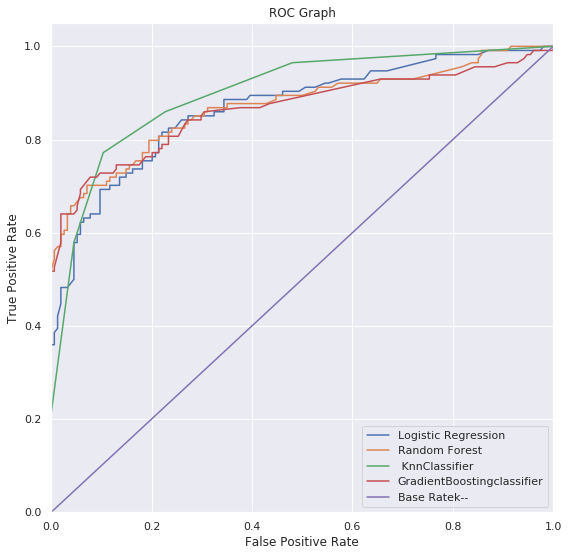

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gscv.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rfcv.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, gsknn.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, ada_thresholds = roc_curve(y_test, gbcv.predict_proba(X_test)[:,1])

plt.figure(figsize=(9,9))
log_roc_auc = roc_auc_score(y_test, gscv.predict(X_test))
print ("logreg model AUC = {} " .format(log_roc_auc))
rf_roc_auc = roc_auc_score(y_test, rfcv.predict(X_test))
print ("random forest model AUC ={}" .format(rf_roc_auc))
knn_roc_auc = roc_auc_score(y_test, gsknn.predict(X_test))
print ("KNN model AUC = {}" .format(knn_roc_auc))
gbc_roc_auc = roc_auc_score(y_test, gbcv.predict(X_test))
print ("GBC Boost model AUC = {}" .format(gbc_roc_auc))
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression')

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest')

# Plot Decision Tree ROC
plt.plot(knn_fpr, knn_tpr, label=' KnnClassifier')

# Plot GradientBooseting Boost ROC
plt.plot(gbc_fpr, gbc_tpr, label='GradientBoostingclassifier')

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [73]:

test_PassengerId = pd.read_csv('../input/gender_submission.csv')['PassengerId']
submission = pd.concat([pd.DataFrame(test_PassengerId), pd.DataFrame({'Survived':Survived})], axis=1)
submission.to_csv('submission.csv', index=False)